# <center>Metody Numeryczne</center>

# Laboratorium 6: Iteracyjne równania liniowe i macierze rzadkie


**Wykonał:** Karol Ożóg, AGH, WEAIiIB, 2. rok, CWL 6.

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.


Dana jest prostokątna, [rzadka](https://en.wikipedia.org/wiki/Sparse_matrix) macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor kolumnowy zmiennych,
- $\mathbf{b}$ - wektor kolumnowy wyników prawej strony równania. 

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [3]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W macierzach rzadkich większość elementów jest zerami, więc przechowywanie całych macierzy w pamięci jest nieefektywne. W celu optymalizacji macierze te zapisuje się w przeznaczonych do tego [formatach przechowywania danych](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information), jakie udostępnia m.in. moduł [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html). W ramach laboratorium korzystać będziemy z formatu [Compressed Sparse Column (CSC)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html).

1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich w pamięci.

2. Dla $10$ równo rozmieszczonych wartości $m$ z zakresu $[100, 10000]$ wygeneruj macierze rzadkie wymiaru $m \times m$ używając [`sp.sparse.random_array()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random_array.html) z parametrem `density=0.01` oraz parametrem `format` ustawionym tak, aby wygenerowane macierze zapisane zostały w formacie CSC.

2. Porównaj ile pamięci zajmują te same macierze zapisane w formacie `numpy.ndarray` oraz w formacie `scipy.sparse.csc_array`. W tym celu przekonwertuj kopie macierzy utworzonych w poprzednim punkcie do formatu `numpy.ndarray` używając odpowiedniej metody z modułu `scipy.sparse`. Wynik zaprezentuj na jednym wykresie typu *scatter plot*.

3. Opisz wnioski wynikające z wykresu.

> **Wskazówka:** Do obliczenia rozmiaru zmiennych skorzystaj z fragmentu kodu podanego poniżej.


In [3]:
# Fragment kodu wyznaczający ilość zużycia pamięci przez macierze (w bajtach).
n: np.ndarray = ...
n_memory_size = n.nbytes

s: sp.sparse.csc_array = ...
s_memory_size = s.data.nbytes + s.indices.nbytes + s.indptr.nbytes

AttributeError: 'ellipsis' object has no attribute 'nbytes'

Dla N=  100
Pamiec Numpy:  80000
Pamiec Sparce:  2408 

Dla N=  1200
Pamiec Numpy:  11520000
Pamiec Sparce:  240008 

Dla N=  2300
Pamiec Numpy:  42320000
Pamiec Sparce:  864808 

Dla N=  3400
Pamiec Numpy:  92480000
Pamiec Sparce:  1876808 

Dla N=  4500
Pamiec Numpy:  162000000
Pamiec Sparce:  3276008 

Dla N=  5600
Pamiec Numpy:  250880000
Pamiec Sparce:  5062408 

Dla N=  6700
Pamiec Numpy:  359120000
Pamiec Sparce:  7236008 

Dla N=  7800
Pamiec Numpy:  486720000
Pamiec Sparce:  9796808 

Dla N=  8900
Pamiec Numpy:  633680000
Pamiec Sparce:  12744808 

Dla N=  10000
Pamiec Numpy:  800000000
Pamiec Sparce:  16080008 



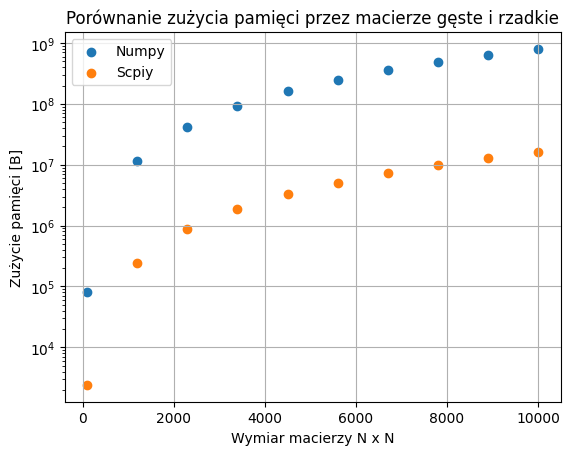

In [4]:
# ===== Twoja implementacja tutaj =====
mem_n=[]
mem_s=[]
N=np.linspace(100,10000,10,dtype=int)
for i in N:
    a=sp.sparse.random_array([i,i],density=0.01,format='csc')
    d=a.toarray()
    n_mem=d.nbytes
    s_mem=a.data.nbytes + a.indices.nbytes + a.indptr.nbytes
    print("Dla N= ",i)
    print("Pamiec Numpy: " ,n_mem)
    print("Pamiec Sparce: " ,s_mem,"\n")
    mem_n.append(n_mem)
    mem_s.append(s_mem)


plt.scatter(N,mem_n,label="Numpy")
plt.scatter(N,mem_s,label="Scpiy")
plt.xlabel('Wymiar macierzy N x N')
plt.ylabel('Zużycie pamięci [B]')
plt.title('Porównanie zużycia pamięci przez macierze gęste i rzadkie')
plt.grid()
plt.legend()
plt.yscale('log')


***Wykonanie i analiza zad. 1***

Na tym laboratorium poznajemy definicje macierzy rzadkiej - czyli takiej, w której większość elementów to zera. Nie ma zatem sensu przechowywać jej w całości, a wystarczy zapisać tylko wartości niezerowe oraz informacje o ich położeniu. Jest kilka sposobów reprezentowania takich macierzy, jak np. CSC (Compressed Sparse Column), w których zapisujemy wartości niezerowe, ich indeksy w obrębie kolumny oraz wskaźniki początku każdej kolumny albo CSR który działaja analogicznie dla wierszy.

W zadaniu porównujemy pamięć zajmowaną przez macierze zapisane w formacie CSC z pamięcią potrzebną na ich pełne, standardowe zapisanie, z wykorzystaniem numpy. W celu utworzenia macierzy rzadkiej wykorzystujemy funkcję *sp.sparse.random_array([i,i],density=0.01,format='csc')* gdzie zadajemy wymiar, odpowiedni format i gęstość macierzy. Na podstawie wyników i wykresów widać wyraźnie, że zapis macierzy w pełnym formacie szybko staje się bardzo kosztowny pamięciowo. Z kolei pamięć zajmowana przez format CSC rośnie powoli, bo przechowuje on tylko wartości niezerowe i ich pozycje. Oznacza to, że przy dużych, rzadkich macierzach formaty przeznaczone specjalnie do reprezentacji rzadkiej struktury są zdecydowanie bardziej efektywne i umożliwiają również szybsze obliczenia, o ile nie wymagają konwersji do formatu gęstego.

---

### **Zadanie 2.**

Korzystając z wiedzy zdobytej podczas realizacji **Zadania 1.** wykonaj polecenia.

1. Wygeneruj macierze rzadkie $\mathbf{A}$ i $\mathbf{B}$ o wymiarach $1000 \times 1000$. Zapisz je w formatach `scipy.sparse.csc_array` oraz `numpy.ndarray`.

2. Porównaj czas potrzebny na wykonanie mnożenia macierzowego $\mathbf{AB}$ dla macierzy zapisanych w formacie `numpy.ndarray` oraz `scipy.sparse.csc_array`.

3. Opisz z czego wynika różnica.

In [10]:
# ===== Twoja implementacja tutaj =====
A=sp.sparse.random_array([1000,1000],density=0.01,format='csc')
A_n=A.toarray()
B=sp.sparse.random_array([1000,1000],density=0.01,format='csc')
B_n=B.toarray()
print("Macierz rzadka:")
t1= %timeit -r 3 -n 3 -o A.dot(B)
print("Macierz gęsta:")
t2= %timeit -r 3 -n 3 -o A_n.dot(B_n)



Macierz rzadka:
1.08 ms ± 256 μs per loop (mean ± std. dev. of 3 runs, 3 loops each)
Macierz gęsta:
20.9 ms ± 8.44 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


***Wykonanie i analiza zad. 2***

W tym zadaniu ponownie zajmujemy się macierzami rzadkimi - tworzymy dwie macierze kwadratowe rzadkie o takim samym rozmiarze, a następnie zmieniamy ich format do macierzy gęstych. Następnie mierzymy czas wykonania się operacji mnożenia macierzowego najpierw dla macierzy rzadkich a ptoem dla tych samych macierzy gęstych i mierzymy czas wykonania się funkcji. Z otrzymanych wyników widzimy że wykonanie mnożenia na macierzach rzadkich było zdecydowanie szybsze od  tego samego działania na danych zapisanych w formacie gęstym. Ta różnica wynika z tego, że w formacie skompresowanym operujemy tylko na niewielkiej liczbie elementów niezerowych. Dzięki temu wykonuje się dużo mniej mnożeń i dodawań, co znacząco przyspiesza obliczenia.

---

### **Zadanie 3.**

Aby metody iteracyjne znalazły rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ należy zadbać o to aby macierz $\mathbf{A}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcenie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, które nie będzie poruszane w ramach tego laboratorium. Na potrzeby zadania należy jedynie sprawdzić czy używana macierz posiada tę własność.

**Punkt 1.**

Zaimplementuj funkcję *`is_diagonally_dominant()`* sprawdzającą czy macierz jest diagonalnie zdominowana.

> **Wskazówka:** W implementacji nie należy używać pętli *for*, ponieważ biblioteka NumPy zawiera funkcje, które znacznie wydajniej iterują po elementach tablic typu `numpy.ndarray`. Lepiej skorzystać z funkcji [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) oraz [`np.diagonal()`](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

<br>

**Punkt 2.**

Poniżej znajduje się zaimplementowana funkcja `generate_matrix()`. Przy jej pomocy wygeneruj macierz $\mathbf{A}$ o wymiarach $1000 \times 1000$. Następnie zweryfikuj czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor wartości losowych $\mathbf{b}$ o długości $1000$.

<br>

**Punkt 3.**

Istnieje wiele metod iteracyjnego rozwiązywania równań, natomiast nie różnią się one znacząco od siebie w kwestii wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. 

1. Korzystając z funkcji *`residual_norm()`*, oraz macierzy zdefiniowanych w **Punkcie 2.**, zbadaj wpływ argumentów `rtol` i `maxiter` na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów.

2. Opisz zaobserwowane zależności.

>**Wskazówka:** Metoda *Conjugate Gradient* wymaga aby macierz była dodatnio określona. Można to zapewnić poprzez podanie argumentu `is_symmetric=True` do funkcji `generate_matrix()`.


In [6]:
# Implementacja funkcji generate_matrix().

from scipy.sparse import diags_array, csc_array


def generate_matrix(m: int = 1000, is_symmetric: bool = False) -> csc_array:
    """Funkcja generująca rzadką, diagonalnie zdominowaną macierz rozmiaru m x m.

    Parameters:
        m (int): Wymiar macierzy.
        is_symmetric (bool): Czy macierz ma być symetryczna.

    Returns:
        (scipy.sparse.csc_array): Macierz rzadka, diagonalnie zdominowana (m,m).

    Raises:
        TypeError: Jeśli 'm' nie jest liczbą całkowitą lub 'is_symmetric' nie 
            jest wartością logiczną.
        ValueError: Jeśli 'm' jest mniejsze niż 5.
    """
    if not isinstance(m, int):
        raise TypeError(
            f"Argument 'm' musi być liczbą całkowitą, otrzymano: {type(m).__name__}."
        )
    if not isinstance(is_symmetric, bool):
        raise TypeError(
            f"Argument 'is_symmetric' musi być wartością logiczną, otrzymano: {type(is_symmetric).__name__}."
        )
    if m < 5:
        raise ValueError("Argument 'm' musi być większy lub równy 5.")

    if is_symmetric:
        num_upper_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags)
        matrix = diags_array(
            diagonal_values, offsets=np.arange(1, num_upper_diags + 1), shape=(m, m)
        )
        matrix = matrix + matrix.T
    else:
        num_upper_diags = np.random.randint(2, m // 2)
        num_lower_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags + num_lower_diags)
        matrix = diags_array(
            diagonal_values,
            offsets=np.arange(-num_lower_diags, num_upper_diags),
            shape=(m, m),
        )

    row_sums = np.asarray(matrix.sum(axis=1)).flatten()
    diagonal_vals = row_sums - np.abs(matrix.diagonal()) + np.random.rand(m)
    matrix.setdiag(diagonal_vals)

    return matrix.tocsc()

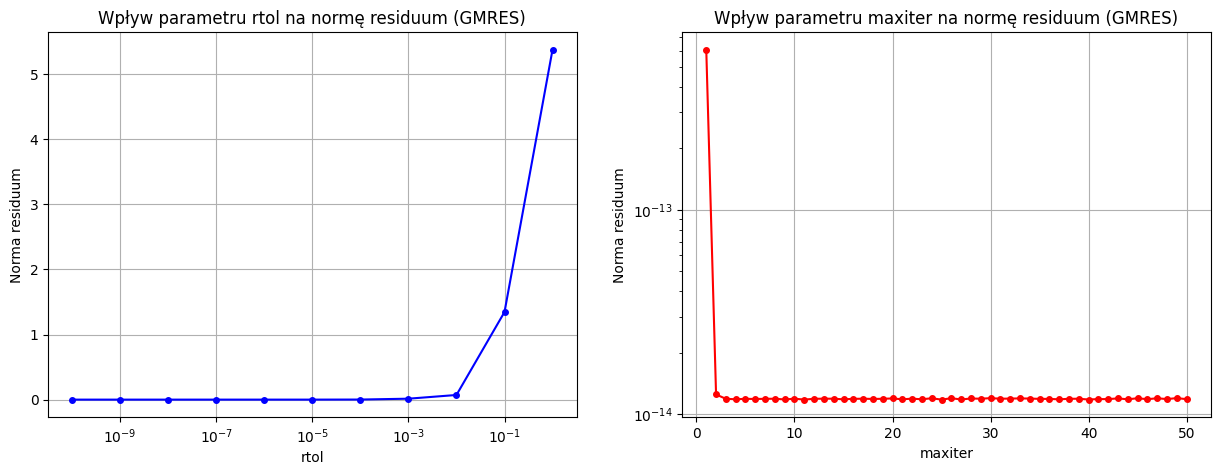

In [8]:
# ===== Twoja implementacja tutaj =====
def is_diagonally_dominant(A: np.ndarray or sp.sparse.csc_array) -> bool or None:
    if not isinstance(A, (np.ndarray, sp.sparse.csc_array)):
        return None
    
    if isinstance(A, sp.sparse._csc.csc_array):
        A = A.toarray()

    if len(A.shape)!=2 or np.size(A,0)!=np.size(A,1):
        return None
    
    diag = np.abs(np.diag(A))
    row_sums = np.sum(np.abs(A), axis=1) - diag
    return np.all(diag > row_sums)


def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float or None:

    if not isinstance(A,np.ndarray) or not isinstance(x,np.ndarray) or not isinstance(b,np.ndarray):
        return None
    
    if A.ndim !=2 or b.ndim !=1 or x.ndim !=1:
        return None
    if np.size(A,1) != np.size(x,0) or np.size(b,0) != np.size(A,0):
        return None
    r=b-A.dot(x)
    norm=np.linalg.norm(r)
    return norm

A=generate_matrix(1000,True)
if is_diagonally_dominant(A):
    b=np.random.rand(1000)
 
    rtol=np.logspace(-10,0,11)
    dif=[]
    a_d=A.toarray()
    for i in rtol:
        x,_=sp.sparse.linalg.gmres(A,b,rtol=i)
        dif.append(residual_norm(a_d,x,b))

    maxtier=np.linspace(1,50,50)
    max=[]
    for i in maxtier:
        x,__=sp.sparse.linalg.gmres(A,b,maxiter=int(i),rtol=1e-20)
        max.append(residual_norm(a_d,x,b))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.semilogx(rtol, dif, 'bo-', markersize=4)
    ax1.set_xlabel('rtol')
    ax1.set_ylabel('Norma residuum')
    ax1.set_title('Wpływ parametru rtol na normę residuum (GMRES)')
    ax1.grid(True)


    ax2.semilogy(maxtier, max, 'ro-', markersize=4)
    ax2.set_xlabel('maxiter')
    ax2.set_ylabel('Norma residuum')
    ax2.set_title('Wpływ parametru maxiter na normę residuum (GMRES)')
    ax2.grid(True)
else:
    print("Macierz nie jest diagonalnie zdominowana")
       

***Wykonanie i analiza zad.3***

W zadaniu rozwiązujemy układ 𝐴𝑥=𝑏 dla macierzy rzadkiej 𝐴. Sprawdzamy najpierw, czy A jest diagonalnie zdominowana wykorzystując zaimplementowaną przez nas funkcję która porównuje wartość bezwględną na diagonoali do sumy wartości bezwględnych w pozostałych elementach wiresza. Następnie rozwiązujemy równanie macierzowe wykorzystując metodę GMRES i badamy wpływ parametrów: rtol (tolerancja względna) oraz maxiter. Z uzyskanych wyników, widać że zmniejszanie rtol obniża normę residuum proporcjonalnie do zera, natomiast zwiększanie maxiter działa tylko do momentu osiągnięcia zbieżności co dla naszych danych nastąpiło bardzo szybko juz w pierwszych iteracjach.  Metoda GMRES wykorzystuje fakt, że macierz jest rzadka, co pozwala na przyspieszenie obliczeń. Osiągnięty błąd nie maleje w nieskończoność – po pewnym punkcie jest ograniczony precyzją obliczeń zmiennoprzecinkowych. Kluczowy dla dokładności wyniku jest dobór tolerancji błędu, a nie maksymalnej liczby iteracji, ponieważ po uzyskaniu zbieżności dalsze iteracje nie wpływają już na poprawę residuum.

---

***WNIOSKI***

Na laboratorium zapoznaliśmy się z pojęciem macierzy rzadkich i operacjami na nich we środowisku Pyton. Ćwiczenia pokazały wyraźną przewagę macierzy rzadkich w formacie CSC  w porównaniu z macierzami gęstymi: zajmują znacznie mniej pamięci i pozwalają wykonywać operacje dużo szybciej, ponieważ pomijają obliczenia na elementach zerowych. Dzięki temu nawet duże układy równań mogą być rozwiązywane efektywnie. Poznaliśmy także metody sprawdzenia czy macierz jest diagonalnie zdominowana, co było potrzebne do zastosowania metody GMRES. Testy pokazały, że o dokładności rozwiązania równania macierzwoego tą metodą decyduje głównie parametr rtol: im jest mniejszy, tym niższa norma residuum, aż do granicy dokładności obliczeń. Z kolei maxiter poprawia wynik tylko do momentu osiągnięcia zbieżności, która w naszym przypadku nastąpiła bardzo szybko. Potwierdza to, że przy macierzach rzadkich i odpowiednio dobranych parametrach metoda działa szybko i stabilnie.

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)